### Project Description - 
**HR Analytics Project: Understanding Employee Attrition for Enhanced Organizational Performance**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

The Data has 1470 rows and 35 columns

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We can see that there are three features with Same Value (Employee Count, Over18 and Standard Hours) they can be dropped later on

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The Data Doesn't contain Null Values and is a mix of Int and Object Type

Target Variable is - Attrition whereas rest are Independent Features or Variables

### Visualization of Target and Independent Variables

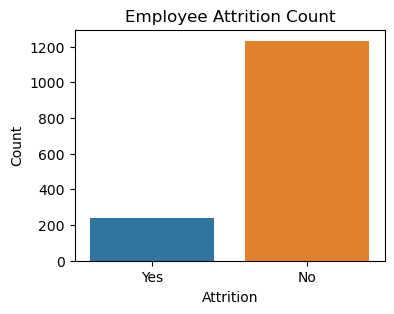

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="Attrition")
plt.xticks(ticks=[0, 1], labels=["Yes", "No"])
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Employee Attrition Count")
plt.show()

The Attrition Rate is Less for Yes compared to No

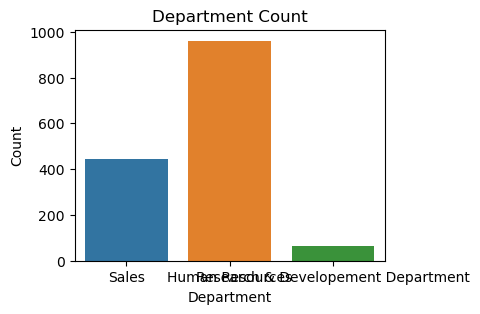

In [8]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="Department")
plt.xticks(ticks=[0, 1, 2], labels=["Sales", "Human Resources", "Research & Developement Department"])
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department Count")
plt.show()

Maximum Number of Employees are in Research and Development Department

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

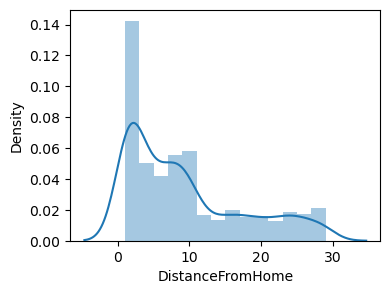

In [9]:
plt.figure(figsize=(4,3))
sns.distplot(df['DistanceFromHome'])

Employees travel mostly from 0.2 to 11 Units 

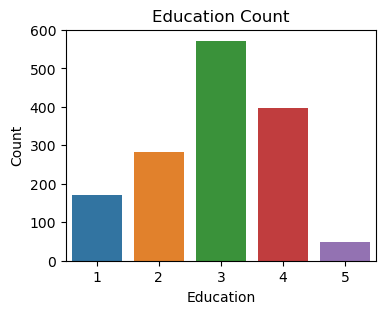

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="Education")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["1", "2", "3", "4", "5"])
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education Count")
plt.show()

Employees have Major Education count of 3 and 4

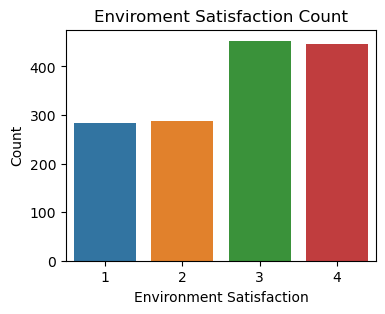

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="EnvironmentSatisfaction")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1", "2", "3", "4"])
plt.xlabel("Environment Satisfaction")
plt.ylabel("Count")
plt.title("Enviroment Satisfaction Count")
plt.show()

Employees have good Environment Satisfaction as 3,4 Units are Maximum

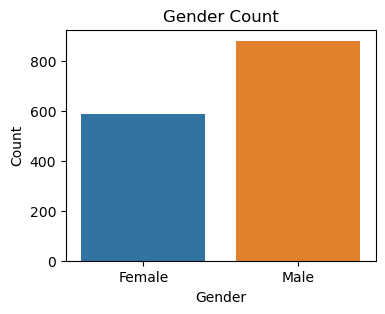

In [12]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="Gender")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count")
plt.show()

The Count of Male Employees is Significantly higher than Females

<Axes: xlabel='HourlyRate', ylabel='Density'>

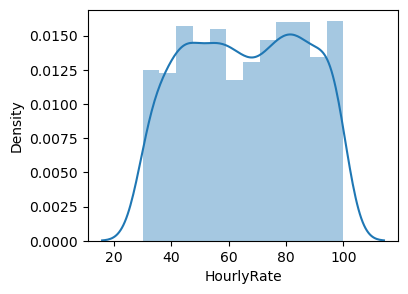

In [13]:
plt.figure(figsize=(4,3))
sns.distplot(df['HourlyRate'])

The Hourly Rate of Employees is between 30 to 100 Units

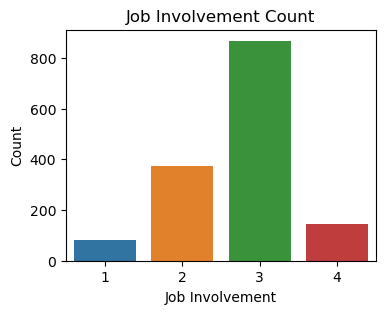

In [14]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="JobInvolvement")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1", "2", "3", "4"])
plt.xlabel("Job Involvement")
plt.ylabel("Count")
plt.title("Job Involvement Count")
plt.show()

We can assume that Job Involvement of Employees is Good as Maximum are in 3 Unit Range

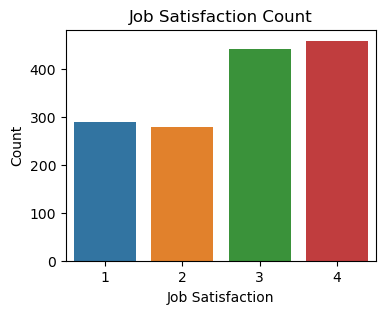

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="JobSatisfaction")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1", "2", "3", "4"])
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.title("Job Satisfaction Count")
plt.show()

We can assume that Job Satisfaction of Employees is Good as Maximum lie between 3 and 4 Units

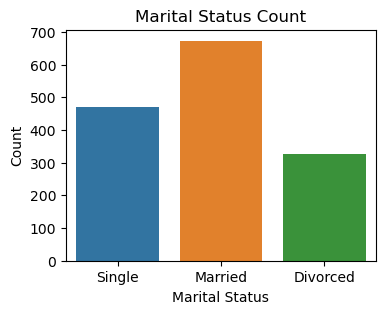

In [16]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="MaritalStatus")
plt.xticks(ticks=[0, 1, 2], labels=["Single", "Married", "Divorced"])
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Count")
plt.show()

Married Employees are more as compared to Single and Divorced

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

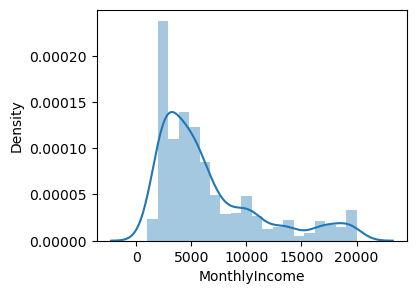

In [17]:
plt.figure(figsize=(4,3))
sns.distplot(df['MonthlyIncome'])

Majority of Employees have Monthly Income of less than 8000

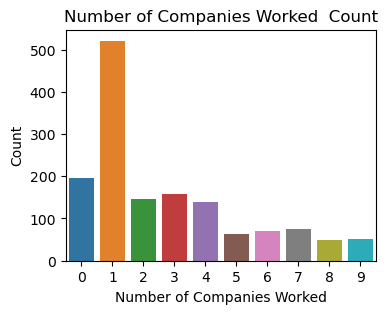

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="NumCompaniesWorked")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.xlabel("Number of Companies Worked")
plt.ylabel("Count")
plt.title("Number of Companies Worked  Count")
plt.show()

Maximum Employees have work Experience of Only 1 Company, No of freshers is also good

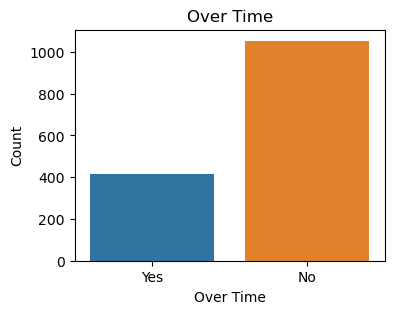

In [20]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="OverTime")
plt.xticks(ticks=[0, 1], labels=["Yes", "No"])
plt.xlabel("Over Time")
plt.ylabel("Count")
plt.title("Over Time")
plt.show()

Lesser Number of Employees do Overtime

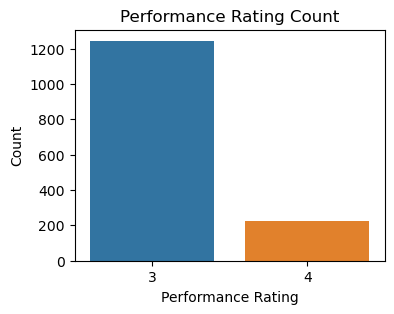

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="PerformanceRating")
plt.xticks(ticks=[0, 1], labels=["3", "4"])
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.title("Performance Rating Count")
plt.show()

Majority of Employees have Performance Rating of 3 which suggest company works of there Development

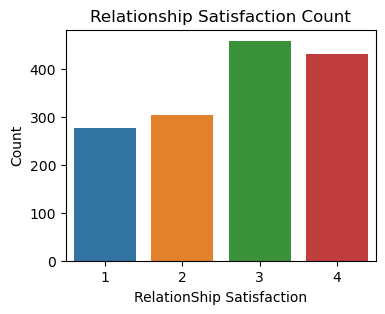

In [22]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="RelationshipSatisfaction")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1", "2", "3", "4"])
plt.xlabel("RelationShip Satisfaction")
plt.ylabel("Count")
plt.title("Relationship Satisfaction Count")
plt.show()

Relation Satisfaction is again good

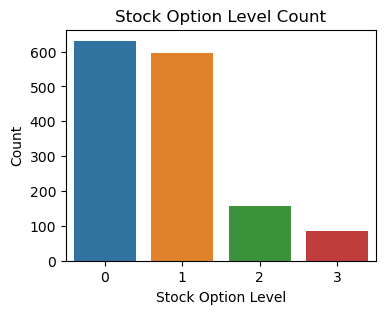

In [23]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="StockOptionLevel")
plt.xticks(ticks=[0, 1, 2, 3], labels=["0", "1", "2", "3"])
plt.xlabel("Stock Option Level")
plt.ylabel("Count")
plt.title("Stock Option Level Count")
plt.show()

Majority Employees presently dont have Stock Options

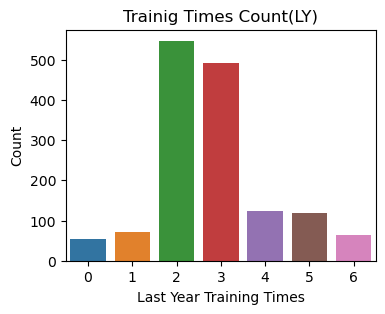

In [24]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="TrainingTimesLastYear")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["0", "1", "2", "3", "4", "5", "6"])
plt.xlabel("Last Year Training Times")
plt.ylabel("Count")
plt.title("Trainig Times Count(LY)")
plt.show()

Training count is Satisfactory for Employees

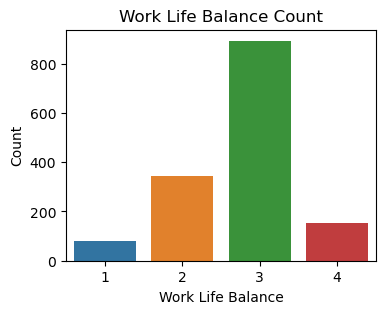

In [25]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x="WorkLifeBalance")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1", "2", "3", "4"])
plt.xlabel("Work Life Balance")
plt.ylabel("Count")
plt.title("Work Life Balance Count")
plt.show()

Maximum Employees are in 3rd Unit of Work Life Balance, we can assume company is having good work life Balance

### Label Encoding
Going to Encode Variables in Object form

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
L=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
  'OverTime','Over18']
for i in L:
    df[i]=le.fit_transform(df[i])

In [28]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1009,58,0,2,1055,1,1,3,3,1,1423,...,3,80,1,32,3,3,9,8,1,5
60,32,0,2,427,1,1,3,3,1,78,...,2,80,1,9,3,3,9,8,7,8
424,57,0,2,210,2,29,3,2,1,568,...,3,80,1,32,3,2,1,0,0,0
1178,20,0,2,1141,2,2,3,3,1,1657,...,1,80,0,2,3,3,2,2,2,2
1386,26,0,2,157,1,1,3,3,1,1952,...,4,80,0,8,6,2,7,7,7,6


In [29]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

All Variables have been conveter to int

# Descriptive Statstics

In [30]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

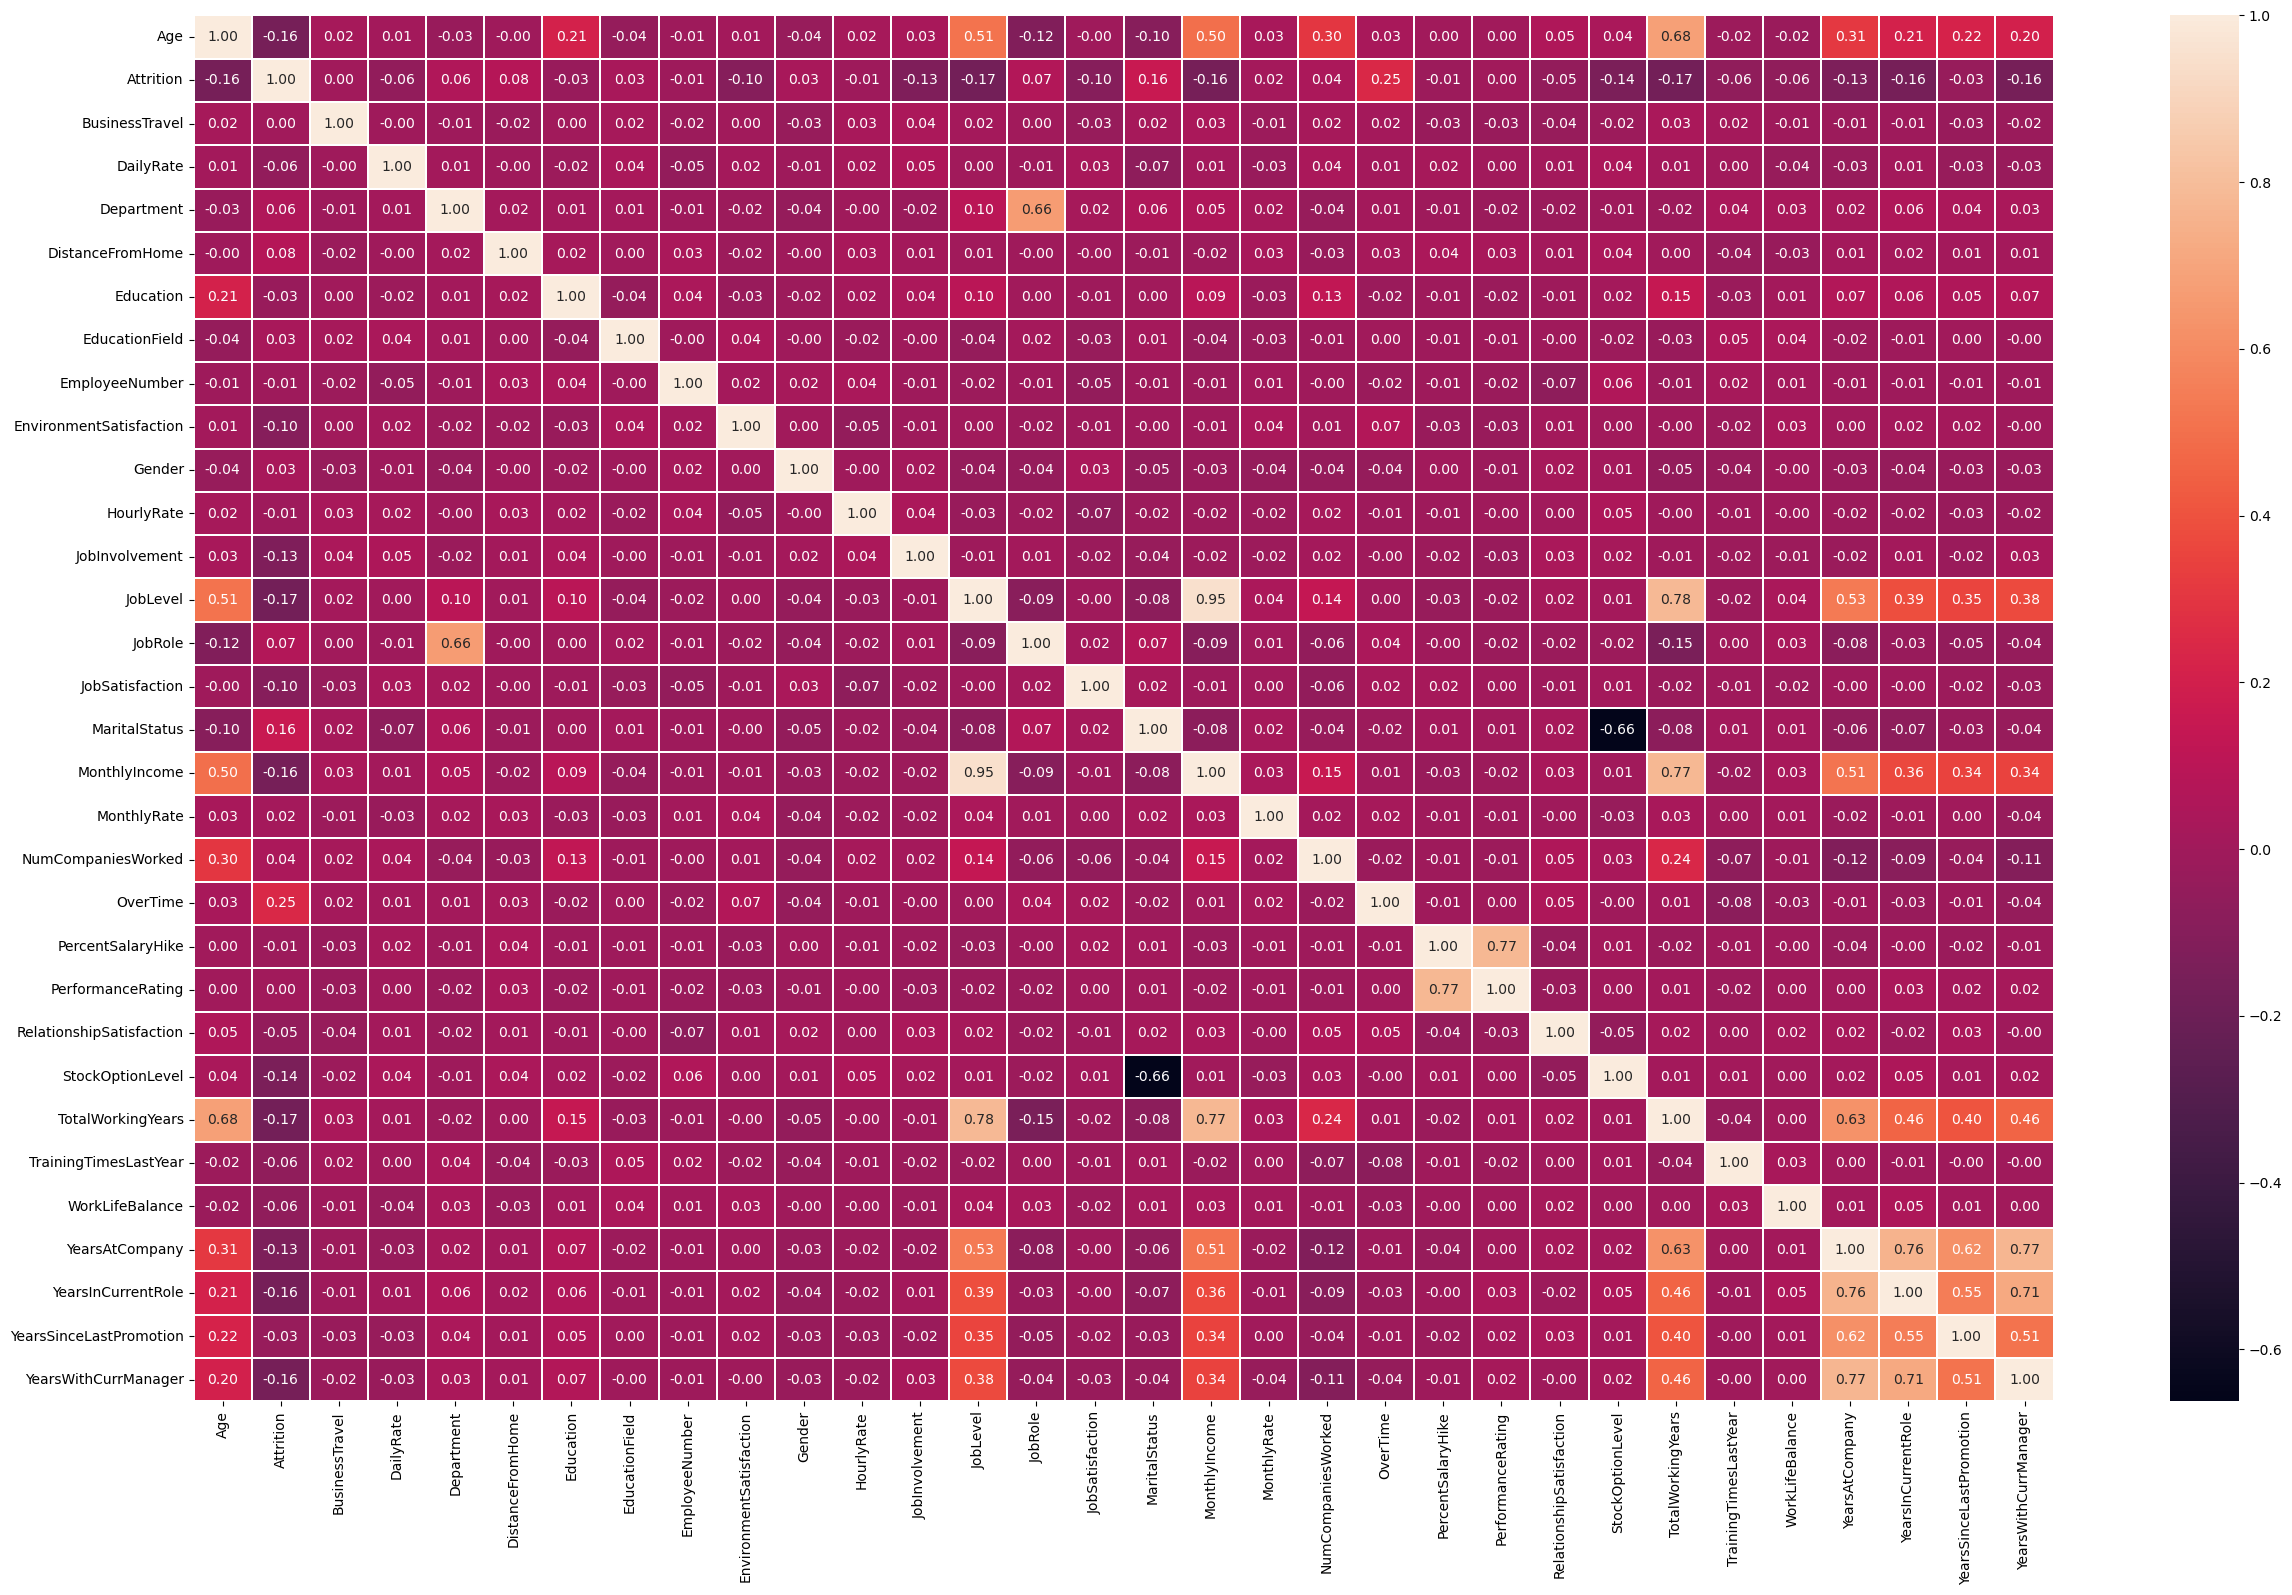

In [32]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt='0.2f')
plt.show()

In [33]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

Few columns like Performance Rating and Percent Salary Hike Have High Correlation(77%)
and Years at company and Year at Current role 76% correlated 

In [34]:
df.drop(['PerformanceRating','YearsInCurrentRole'],axis=1,inplace=True)

### Handling Outliers

In [35]:
df.shape

(1470, 30)

Age                            Axes(0.125,0.747241;0.110714x0.132759)
Attrition                   Axes(0.257857,0.747241;0.110714x0.132759)
BusinessTravel              Axes(0.390714,0.747241;0.110714x0.132759)
DailyRate                   Axes(0.523571,0.747241;0.110714x0.132759)
Department                  Axes(0.656429,0.747241;0.110714x0.132759)
DistanceFromHome            Axes(0.789286,0.747241;0.110714x0.132759)
Education                      Axes(0.125,0.587931;0.110714x0.132759)
EducationField              Axes(0.257857,0.587931;0.110714x0.132759)
EmployeeNumber              Axes(0.390714,0.587931;0.110714x0.132759)
EnvironmentSatisfaction     Axes(0.523571,0.587931;0.110714x0.132759)
Gender                      Axes(0.656429,0.587931;0.110714x0.132759)
HourlyRate                  Axes(0.789286,0.587931;0.110714x0.132759)
JobInvolvement                 Axes(0.125,0.428621;0.110714x0.132759)
JobLevel                    Axes(0.257857,0.428621;0.110714x0.132759)
JobRole             

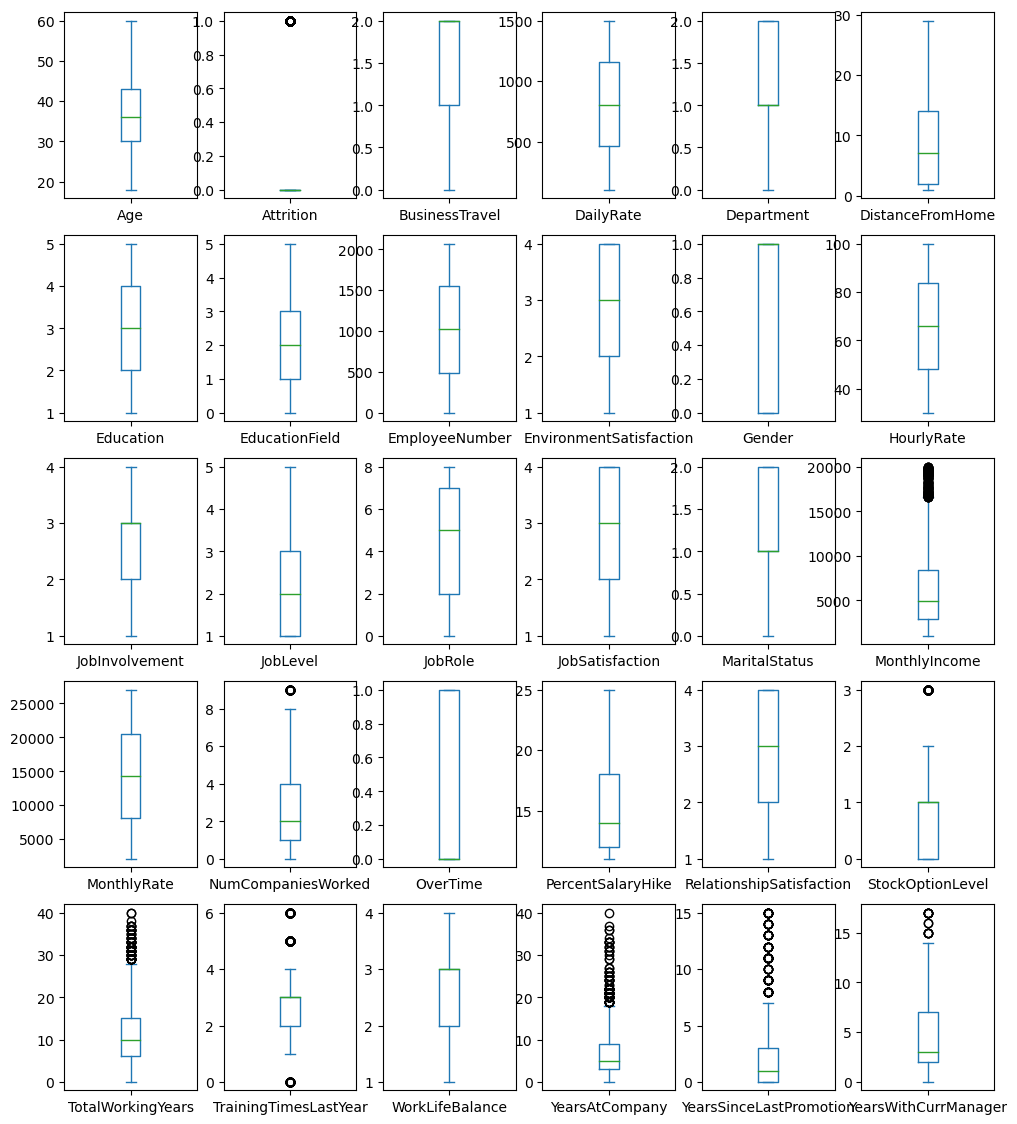

In [36]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(12,14))

The Boxplot confirms presence of Outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([  28,   45,   62,   62,   64,   85,   98,   98,  110,  123,  123,
         126,  126,  126,  153,  178,  187,  187,  190,  218,  231,  237,
         237,  270,  270,  326,  386,  386,  401,  411,  425,  425,  427,
         445,  473,  477,  535,  561,  561,  584,  592,  595,  595,  595,
         616,  624,  635,  653,  653,  677,  686,  701,  749,  752,  799,
         838,  861,  861,  875,  875,  894,  914,  914,  918,  922,  926,
         926,  937,  956,  962,  976, 1008, 1043, 1078, 1078, 1086, 1086,
        1093, 1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223,
        1242, 1295, 1301, 1301, 1303, 1331, 1348, 1401, 1414], dtype=int64),
 array([29, 28, 27, 28, 28, 24, 24, 27, 28, 28, 29, 24, 27, 28, 29, 28, 24,
        29, 27, 28, 29, 27, 28, 24, 27, 28, 28, 29, 24, 27, 27, 28, 28, 24,
        27, 27, 28, 27, 29, 28, 27, 24, 27, 28, 29, 24, 29, 27, 28, 27, 29,
        28, 27, 28, 28, 28, 27, 28, 28, 29, 24, 27, 28, 27, 28, 28, 29, 28,
        24, 27, 28, 28, 24,

In [38]:
dfn=df[(z<3).all(axis=1)]
dfn.shape

(1396, 30)

Loss of Data = (1470-1396)/1470*100=5%

### Handling Skewness

In [39]:
dfn.skew().sort_values()

BusinessTravel             -1.425472
WorkLifeBalance            -0.556652
JobInvolvement             -0.509139
Gender                     -0.406858
JobRole                    -0.390168
JobSatisfaction            -0.345527
EnvironmentSatisfaction    -0.315979
RelationshipSatisfaction   -0.290901
Education                  -0.287985
MaritalStatus              -0.156633
HourlyRate                 -0.030553
DailyRate                  -0.016078
EmployeeNumber              0.018467
MonthlyRate                 0.032477
Department                  0.183475
Age                         0.465533
EducationField              0.544560
TrainingTimesLastYear       0.578637
YearsWithCurrManager        0.680904
PercentSalaryHike           0.800660
DistanceFromHome            0.954545
StockOptionLevel            0.957525
OverTime                    0.964771
TotalWorkingYears           1.013725
NumCompaniesWorked          1.035919
JobLevel                    1.114363
YearsAtCompany              1.252927
M

The Skewness needs to be Managed

In [40]:
list=["BusinessTravel","OverTime","TotalWorkingYears","NumCompaniesWorked","JobLevel","YearsAtCompany","MonthlyIncome","YearsSinceLastPromotion"]
for i in list:
    dfn[i]=np.log1p(dfn[i])

In [41]:
dfn.skew().sort_values()

BusinessTravel             -1.801164
TotalWorkingYears          -0.725349
WorkLifeBalance            -0.556652
JobInvolvement             -0.509139
Gender                     -0.406858
JobRole                    -0.390168
YearsAtCompany             -0.364838
JobSatisfaction            -0.345527
EnvironmentSatisfaction    -0.315979
RelationshipSatisfaction   -0.290901
Education                  -0.287985
MaritalStatus              -0.156633
HourlyRate                 -0.030553
DailyRate                  -0.016078
EmployeeNumber              0.018467
MonthlyRate                 0.032477
NumCompaniesWorked          0.098689
Department                  0.183475
MonthlyIncome               0.317588
Age                         0.465533
JobLevel                    0.491805
EducationField              0.544560
TrainingTimesLastYear       0.578637
YearsWithCurrManager        0.680904
YearsSinceLastPromotion     0.688427
PercentSalaryHike           0.800660
DistanceFromHome            0.954545
S

The Range of Skewness is now +/-0.85 and has been reduced

### Data Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
x=dfn.drop(['Attrition'],axis=1)
y=dfn['Attrition']

In [44]:
dfx=sc.fit_transform(x)

### Spliting Train and Test Data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [46]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range (0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, accuracy score is {accuracy_score(y_train,pred_train)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_train,pred_train)}")
        print(f"at random state {i}, classification report is {classification_report(y_train,pred_train)}")
        print("\n")
    print("Max Accuracy at Random State",rs,"=",maxacc)
    

### KNeighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0, accuracy score is 0.8628454452405322
at random state 0, confusion matrix is [[798  12]
 [122  45]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.92       810
           1       0.79      0.27      0.40       167

    accuracy                           0.86       977
   macro avg       0.83      0.63      0.66       977
weighted avg       0.85      0.86      0.83       977



at random state 1, accuracy score is 0.8628454452405322
at random state 1, confusion matrix is [[796  10]
 [124  47]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.92       806
           1       0.82      0.27      0.41       171

    accuracy                           0.86       977
   macro avg       0.84      0.63      0.67       977
weighted avg       0.86      0.86      0.83       977



at random state 2,

at random state 19, accuracy score is 0.8689866939611054
at random state 19, confusion matrix is [[808   7]
 [121  41]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       815
           1       0.85      0.25      0.39       162

    accuracy                           0.87       977
   macro avg       0.86      0.62      0.66       977
weighted avg       0.87      0.87      0.84       977



at random state 20, accuracy score is 0.8679631525076765
at random state 20, confusion matrix is [[815   6]
 [123  33]]
at random state 20, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       821
           1       0.85      0.21      0.34       156

    accuracy                           0.87       977
   macro avg       0.86      0.60      0.63       977
weighted avg       0.87      0.87      0.83       977



at random st

at random state 36, accuracy score is 0.8689866939611054
at random state 36, confusion matrix is [[807   6]
 [122  42]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       813
           1       0.88      0.26      0.40       164

    accuracy                           0.87       977
   macro avg       0.87      0.62      0.66       977
weighted avg       0.87      0.87      0.84       977



at random state 37, accuracy score is 0.8812691914022518
at random state 37, confusion matrix is [[817   5]
 [111  44]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.88      0.99      0.93       822
           1       0.90      0.28      0.43       155

    accuracy                           0.88       977
   macro avg       0.89      0.64      0.68       977
weighted avg       0.88      0.88      0.85       977



at random st

at random state 53, accuracy score is 0.8659160696008188
at random state 53, confusion matrix is [[805  11]
 [120  41]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.92       816
           1       0.79      0.25      0.38       161

    accuracy                           0.87       977
   macro avg       0.83      0.62      0.65       977
weighted avg       0.86      0.87      0.84       977



at random state 54, accuracy score is 0.887410440122825
at random state 54, confusion matrix is [[820   2]
 [108  47]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.94       822
           1       0.96      0.30      0.46       155

    accuracy                           0.89       977
   macro avg       0.92      0.65      0.70       977
weighted avg       0.90      0.89      0.86       977



at random sta

at random state 70, accuracy score is 0.8567041965199591
at random state 70, confusion matrix is [[794   8]
 [132  43]]
at random state 70, classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       802
           1       0.84      0.25      0.38       175

    accuracy                           0.86       977
   macro avg       0.85      0.62      0.65       977
weighted avg       0.85      0.86      0.82       977



at random state 71, accuracy score is 0.8689866939611054
at random state 71, confusion matrix is [[810  10]
 [118  39]]
at random state 71, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       820
           1       0.80      0.25      0.38       157

    accuracy                           0.87       977
   macro avg       0.83      0.62      0.65       977
weighted avg       0.86      0.87      0.84       977



at random st

at random state 88, accuracy score is 0.8833162743091095
at random state 88, confusion matrix is [[822   7]
 [107  41]]
at random state 88, classification report is               precision    recall  f1-score   support

           0       0.88      0.99      0.94       829
           1       0.85      0.28      0.42       148

    accuracy                           0.88       977
   macro avg       0.87      0.63      0.68       977
weighted avg       0.88      0.88      0.86       977



at random state 89, accuracy score is 0.8741044012282497
at random state 89, confusion matrix is [[809   6]
 [117  45]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       815
           1       0.88      0.28      0.42       162

    accuracy                           0.87       977
   macro avg       0.88      0.64      0.68       977
weighted avg       0.88      0.87      0.85       977



at random st

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83571429 0.83512545 0.83512545 0.85663082 0.86021505]
0.8445622119815669
0.011375884035394551


### Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
model_selection(dct)

at random state 0, accuracy score is 1.0
at random state 0, confusion matrix is [[810   0]
 [  0 167]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       167

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 1, accuracy score is 1.0
at random state 1, confusion matrix is [[806   0]
 [  0 171]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       806
           1       1.00      1.00      1.00       171

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 2, accuracy score is 1.0
at rand

at random state 17, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       156

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 18, accuracy score is 1.0
at random state 18, confusion matrix is [[814   0]
 [  0 163]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00       163

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 19, accuracy score is 1.0
at random state 19, confusion matrix is [[815   0]
 [  0 162]]
at random state 19, classification report 

at random state 35, accuracy score is 1.0
at random state 35, confusion matrix is [[811   0]
 [  0 166]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       811
           1       1.00      1.00      1.00       166

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 36, accuracy score is 1.0
at random state 36, confusion matrix is [[813   0]
 [  0 164]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       813
           1       1.00      1.00      1.00       164

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 37, accuracy score is 1.0


at random state 53, accuracy score is 1.0
at random state 53, confusion matrix is [[816   0]
 [  0 161]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      1.00      1.00       161

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 54, accuracy score is 1.0
at random state 54, confusion matrix is [[822   0]
 [  0 155]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       155

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 55, accuracy score is 1.0


at random state 71, accuracy score is 1.0
at random state 71, confusion matrix is [[820   0]
 [  0 157]]
at random state 71, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       157

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 72, accuracy score is 1.0
at random state 72, confusion matrix is [[821   0]
 [  0 156]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       156

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 73, accuracy score is 1.0


at random state 89, accuracy score is 1.0
at random state 89, confusion matrix is [[815   0]
 [  0 162]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       815
           1       1.00      1.00      1.00       162

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 90, accuracy score is 1.0
at random state 90, confusion matrix is [[815   0]
 [  0 162]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       815
           1       1.00      1.00      1.00       162

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 91, accuracy score is 1.0


In [50]:
score=cross_val_score(dct,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77857143 0.81362007 0.77777778 0.75268817 0.75985663]
0.7765028161802354
0.021108425345155297


### SVC

In [51]:
from sklearn.svm import SVC
svc=SVC()
model_selection(svc)

at random state 0, accuracy score is 0.9293756397134084
at random state 0, confusion matrix is [[809   1]
 [ 68  99]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       810
           1       0.99      0.59      0.74       167

    accuracy                           0.93       977
   macro avg       0.96      0.80      0.85       977
weighted avg       0.93      0.93      0.92       977



at random state 1, accuracy score is 0.9242579324462641
at random state 1, confusion matrix is [[805   1]
 [ 73  98]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       806
           1       0.99      0.57      0.73       171

    accuracy                           0.92       977
   macro avg       0.95      0.79      0.84       977
weighted avg       0.93      0.92      0.92       977



at random state 2,

at random state 18, accuracy score is 0.9181166837256909
at random state 18, confusion matrix is [[813   1]
 [ 79  84]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.91      1.00      0.95       814
           1       0.99      0.52      0.68       163

    accuracy                           0.92       977
   macro avg       0.95      0.76      0.82       977
weighted avg       0.92      0.92      0.91       977



at random state 19, accuracy score is 0.9242579324462641
at random state 19, confusion matrix is [[815   0]
 [ 74  88]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       815
           1       1.00      0.54      0.70       162

    accuracy                           0.92       977
   macro avg       0.96      0.77      0.83       977
weighted avg       0.93      0.92      0.91       977



at random st

at random state 36, accuracy score is 0.9232343909928352
at random state 36, confusion matrix is [[810   3]
 [ 72  92]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       813
           1       0.97      0.56      0.71       164

    accuracy                           0.92       977
   macro avg       0.94      0.78      0.83       977
weighted avg       0.93      0.92      0.91       977



at random state 37, accuracy score is 0.9201637666325486
at random state 37, confusion matrix is [[820   2]
 [ 76  79]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.95       822
           1       0.98      0.51      0.67       155

    accuracy                           0.92       977
   macro avg       0.95      0.75      0.81       977
weighted avg       0.92      0.92      0.91       977



at random st

at random state 54, accuracy score is 0.925281473899693
at random state 54, confusion matrix is [[821   1]
 [ 72  83]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       822
           1       0.99      0.54      0.69       155

    accuracy                           0.93       977
   macro avg       0.95      0.77      0.83       977
weighted avg       0.93      0.93      0.92       977



at random state 55, accuracy score is 0.9191402251791198
at random state 55, confusion matrix is [[802   3]
 [ 76  96]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.91      1.00      0.95       805
           1       0.97      0.56      0.71       172

    accuracy                           0.92       977
   macro avg       0.94      0.78      0.83       977
weighted avg       0.92      0.92      0.91       977



at random sta

at random state 72, accuracy score is 0.9232343909928352
at random state 72, confusion matrix is [[820   1]
 [ 74  82]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       821
           1       0.99      0.53      0.69       156

    accuracy                           0.92       977
   macro avg       0.95      0.76      0.82       977
weighted avg       0.93      0.92      0.91       977



at random state 73, accuracy score is 0.9211873080859775
at random state 73, confusion matrix is [[829   1]
 [ 76  71]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       830
           1       0.99      0.48      0.65       147

    accuracy                           0.92       977
   macro avg       0.95      0.74      0.80       977
weighted avg       0.93      0.92      0.91       977



at random st

at random state 90, accuracy score is 0.9273285568065507
at random state 90, confusion matrix is [[813   2]
 [ 69  93]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.92      1.00      0.96       815
           1       0.98      0.57      0.72       162

    accuracy                           0.93       977
   macro avg       0.95      0.79      0.84       977
weighted avg       0.93      0.93      0.92       977



at random state 91, accuracy score is 0.9211873080859775
at random state 91, confusion matrix is [[817   0]
 [ 77  83]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       0.91      1.00      0.95       817
           1       1.00      0.52      0.68       160

    accuracy                           0.92       977
   macro avg       0.96      0.76      0.82       977
weighted avg       0.93      0.92      0.91       977



at random st

In [52]:
score=cross_val_score(svc,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.875      0.86021505 0.86379928 0.86738351 0.87455197]
0.8681899641577061
0.005837454292079687


### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0, accuracy score is 1.0
at random state 0, confusion matrix is [[810   0]
 [  0 167]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       167

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 1, accuracy score is 1.0
at random state 1, confusion matrix is [[806   0]
 [  0 171]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       806
           1       1.00      1.00      1.00       171

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 2, accuracy score is 1.0
at rand

at random state 18, accuracy score is 1.0
at random state 18, confusion matrix is [[814   0]
 [  0 163]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00       163

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 19, accuracy score is 1.0
at random state 19, confusion matrix is [[815   0]
 [  0 162]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       815
           1       1.00      1.00      1.00       162

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 20, accuracy score is 1.0


at random state 36, accuracy score is 1.0
at random state 36, confusion matrix is [[813   0]
 [  0 164]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       813
           1       1.00      1.00      1.00       164

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 37, accuracy score is 1.0
at random state 37, confusion matrix is [[822   0]
 [  0 155]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       155

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 38, accuracy score is 1.0


at random state 54, accuracy score is 1.0
at random state 54, confusion matrix is [[822   0]
 [  0 155]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       155

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 55, accuracy score is 1.0
at random state 55, confusion matrix is [[805   0]
 [  0 172]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       172

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 56, accuracy score is 1.0


at random state 72, accuracy score is 1.0
at random state 72, confusion matrix is [[821   0]
 [  0 156]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       156

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 73, accuracy score is 1.0
at random state 73, confusion matrix is [[830   0]
 [  0 147]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       1.00      1.00      1.00       147

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 74, accuracy score is 1.0


at random state 90, accuracy score is 1.0
at random state 90, confusion matrix is [[815   0]
 [  0 162]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       815
           1       1.00      1.00      1.00       162

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 91, accuracy score is 1.0
at random state 91, confusion matrix is [[817   0]
 [  0 160]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00       817
           1       1.00      1.00      1.00       160

    accuracy                           1.00       977
   macro avg       1.00      1.00      1.00       977
weighted avg       1.00      1.00      1.00       977



at random state 92, accuracy score is 1.0


In [54]:
score=cross_val_score(rf,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84285714 0.86379928 0.86738351 0.85304659 0.85663082]
0.8567434715821811
0.00859656512887559


# Model Selected  - KNeighborsClassifier

We will Select KNeighborsClassifier for Predicting Attrition because - 

a. It has the Minimum Difference Between Accuracy Score and CV Score

b. It has Minimum False and True Negative Value

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
dict={"n_neighbors":[7,8,9],
      "weights":['uniform', 'distance'],
      "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
      "leaf_size":[30,40,50]}

In [57]:
gd=GridSearchCV(estimator=knn,param_grid=dict,cv=5)

In [58]:
gd.fit(dfx,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [59]:
gd.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}

In [60]:
gd.best_score_

0.8553072196620584

# Building the Final Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors=7, weights= 'uniform')
instance=knn
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=9,test_size=0.30)
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {9}, accuracy score is {accuracy_score(y_train,pred_train)}")
print(f"at random state {9}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state {9}, classification report is {classification_report(y_test,pred_test)}")
        

at random state 9, accuracy score is 0.8638689866939611
at random state 9, confusion matrix is [[358   1]
 [ 51   9]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.90      0.15      0.26        60

    accuracy                           0.88       419
   macro avg       0.89      0.57      0.59       419
weighted avg       0.88      0.88      0.84       419



# ROC AUC Plot

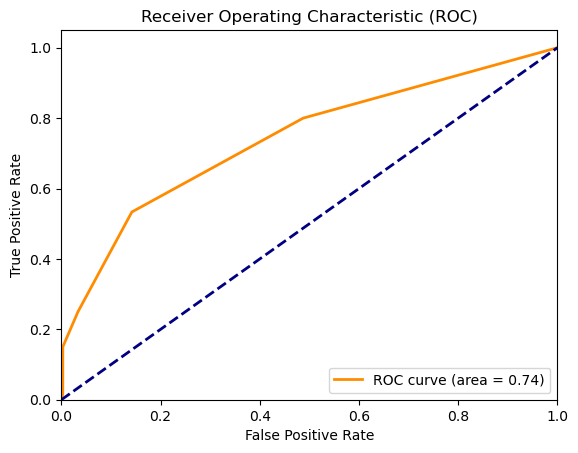

In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The Accuracy Score is 86% and AUC is 74%

### Model Saving

In [63]:
import pickle
filename = 'HR Analytics.pkl'
pickle.dump(knn,open(filename, 'wb'))

# Prediction

In [64]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(25)

,Expected,Predicted
1466,0,0
579,0,0
801,1,0
31,0,0
950,0,0
621,0,0
1250,0,0
786,0,0
355,0,0
331,0,0
